In [2]:
import numpy as np

def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    #print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [24]:
levenshtein('pance','pancia')

[[0. 1. 2. 3. 4. 5. 6.]
 [1. 0. 1. 2. 3. 4. 5.]
 [2. 1. 0. 1. 2. 3. 4.]
 [3. 2. 1. 0. 1. 2. 3.]
 [4. 3. 2. 1. 0. 1. 2.]
 [5. 4. 3. 2. 1. 1. 2.]]


2.0

In [6]:
import pandas as pd
df = pd.read_csv('ex_lan2.csv',delimiter=';',encoding='latin')

In [7]:
df.head()

,FR,EN,DE,ES,CT,IT,RU,PL,UK,AZ,...,SC,MK,LA,EU,WA,ML,AB,LU,IS,IR
0,maison,House,Haus,casa,casa,casa,dom,dom,Budynok,Ev,...,Taigh,Kuka,domum,Etxea,ty,Dar,manzil,Haus,Hús,Teach
1,ville,city,Stadt,ciudad,ciutat,città,gorod,miasto,misto,sahar,...,bhaile-mòr,grad,urbs,hiri,ddinas,belt,madina,Stad,borg,cathrach
2,porte,door,Tür,puerta,porta,porta,dver,drzwi,dveri,qapi,...,doras,vrata,ianua,ate,drws,bieb,bab,Dier,hurdh,doras
3,route,road,Strasse,carretera,carretera,strada,doroga,droga,doroha,Yol,...,rathad,pat,via,errepide,ffordd,fit-triq,tariq,Strooss,vegur,bóthar
4,homme,man,Mann,hombre,home,uomo,chelovek,mezczyzna,lyudyna,adam,...,dhuine,Covek,vir,gizon,dyn,ragel,rajul,Mann,madhur,fear


In [8]:
df.shape

(23, 47)

In [13]:
colname = df.columns

In [4]:
dl = 0
print()
for index, row in df.iterrows(): 
    dl += levenshtein(row[0],row[1])
print(df.columns[0]+'-'+df.columns[1]+': '+str(dl))


FR-EN: 92.0


In [32]:
def comp(l1, l2) :
    dl = 0
    #dfL = pd.DataFrame(index=colname, columns=colname)
    for index, row in df.iterrows(): 
        dl += levenshtein(row[l1],row[l2])
    #print(df.columns[l1]+'-'+df.columns[l2]+': '+str(dl))
    #dfL[df.columns[l1]][df.columns[l2]] = dl
    return (df.columns[l1], df.columns[l2], dl)

In [35]:
dfL = pd.DataFrame(index=colname, columns=colname)

for i in range(0,len(df.columns)) :
    for j in range(0,len(df.columns)):
        r = comp(i,j)
        dfL[r[0]][r[1]] = r[2]

In [36]:
dfL

,FR,EN,DE,ES,CT,IT,RU,PL,UK,AZ,...,SC,MK,LA,EU,WA,ML,AB,LU,IS,IR
FR,0,92,106,83,74,81,131,123,125,121,...,128,122,104,112,114,119,133,111,127,123
EN,92,0,91,99,88,92,118,112,115,109,...,113,116,107,111,98,115,130,88,108,112
DE,106,91,0,113,97,109,122,115,118,114,...,132,118,121,115,116,121,131,44,111,120
ES,83,99,113,0,44,81,125,124,128,123,...,132,119,110,110,119,119,141,115,124,127
CT,74,88,97,44,0,72,123,117,125,112,...,123,112,99,111,105,112,133,102,121,115
IT,81,92,109,81,72,0,125,113,120,114,...,122,112,108,103,107,116,136,116,126,119
RU,131,118,122,125,123,125,0,109,80,129,...,143,91,129,132,137,141,150,129,136,143
PL,123,112,115,124,117,113,109,0,88,117,...,136,108,122,128,124,140,146,120,132,132
UK,125,115,118,128,125,120,80,88,0,122,...,142,101,136,130,127,143,151,125,133,144
AZ,121,109,114,123,112,114,129,117,122,0,...,128,119,126,129,113,121,118,117,120,119


In [225]:
dfD = pd.DataFrame(index=colname, columns=['x','y','z'])
for index, row in dfD.iterrows(): 
    row['x'] = np.random.random_sample()
    row['y'] = np.random.random_sample()
    row['z'] = np.random.random_sample()

In [226]:
dfD

,x,y,z
FR,0.394178,0.463597,0.842574
EN,0.589855,0.312002,0.204541
DE,0.414829,0.873404,0.263598
ES,0.820215,0.431581,0.803069
CT,0.0168609,0.114389,0.5292
IT,0.712686,0.634971,0.197681
RU,0.0738925,0.768445,0.0154234
PL,0.846241,0.126791,0.529989
UK,0.826129,0.847748,0.347794
AZ,0.785945,0.971037,0.826729


In [227]:
from math import *
dfL2 = pd.DataFrame(index=colname, columns=colname)

for i in range(0,len(dfD.index)) :
    for j in range(0,len(dfD.index)):
        d = sqrt((dfD['x'][i]-(dfD['x'][j]))**2+(dfD['y'][i]-(dfD['y'][j]))**2+(dfD['z'][i]-(dfD['z'][j]))**2)
        dfL2[dfD.index[i]][dfD.index[j]] = d
dfL2

,FR,EN,DE,ES,CT,IT,RU,PL,UK,AZ,...,SC,MK,LA,EU,WA,ML,AB,LU,IS,IR
FR,0,0.684366,0.709635,0.42906,0.602095,0.739394,0.93792,0.644599,0.760895,0.641271,...,0.466185,0.549598,0.251939,0.440606,0.432698,0.435189,0.287487,0.891107,0.587891,0.538677
EN,0.684366,0,0.59101,0.652381,0.687588,0.345606,0.714369,0.45382,0.602803,0.927306,...,0.792137,1.03513,0.596429,0.92418,0.415237,0.87239,0.793082,0.63918,0.597978,0.466092
DE,0.709635,0.59101,0,0.806582,0.897233,0.387187,0.434563,0.902502,0.420613,0.681451,...,0.59686,0.744921,0.645004,1.02558,0.593354,0.543076,0.68069,0.336129,0.626281,0.286432
ES,0.42906,0.652381,0.806582,0,0.906087,0.64763,1.13616,0.410058,0.616851,0.541061,...,0.848981,0.652964,0.612442,0.811013,0.258885,0.704387,0.37712,1.05397,0.308169,0.735899
CT,0.602095,0.687588,0.897233,0.906087,0,0.930099,0.833671,0.829473,1.10709,1.18906,...,0.53626,1.1005,0.383404,0.432969,0.79289,0.848215,0.875684,0.84521,1.02896,0.610961
IT,0.739394,0.345606,0.387187,0.64763,0.930099,0,0.677562,0.621701,0.284038,0.716944,...,0.826412,0.888738,0.714287,1.08892,0.403598,0.774095,0.721982,0.568472,0.437512,0.45508
RU,0.93792,0.714369,0.434563,1.13616,0.833671,0.677562,0,1.12828,0.826208,1.09831,...,0.639147,1.09446,0.75918,1.094,0.904021,0.806991,1.01543,0.115498,1.01268,0.411498
PL,0.644599,0.45382,0.902502,0.410058,0.829473,0.621701,1.12828,0,0.743894,0.896907,...,0.983712,1.02341,0.695839,0.898203,0.363117,0.978548,0.731115,1.05075,0.525894,0.780692
UK,0.760895,0.602803,0.420613,0.616851,1.10709,0.284038,0.826208,0.743894,0,0.496179,...,0.887698,0.728074,0.811391,1.17183,0.449019,0.705379,0.633743,0.71465,0.326378,0.585374
AZ,0.641271,0.927306,0.681451,0.541061,1.18906,0.716944,1.09831,0.896907,0.496179,0,...,0.861292,0.316833,0.81255,1.06707,0.570715,0.519142,0.367585,1.011,0.413515,0.775912


In [221]:
dfL = dfL.astype("float32")
dfL2 = dfL2.astype("float32")

In [129]:
import statistics as st

In [222]:
c1 = st.mean(dfL.corrwith(dfL2))

In [223]:
dfDT = dfD.copy()

In [106]:
from IPython.display import display, clear_output
import sys

31.817013531065186


KeyboardInterrupt: 

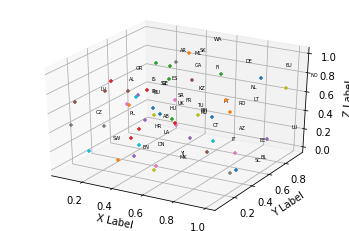

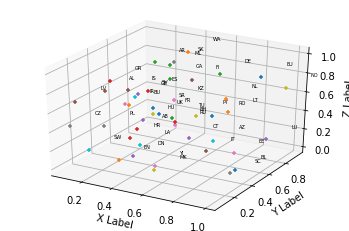

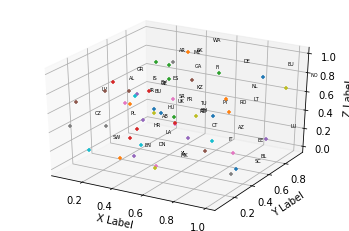

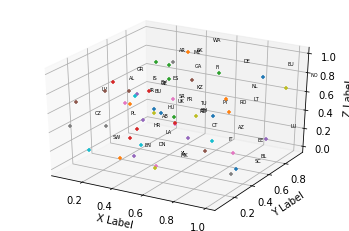

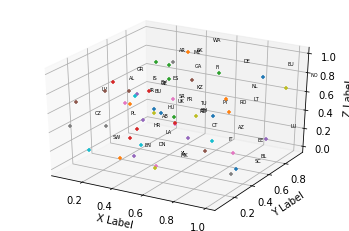

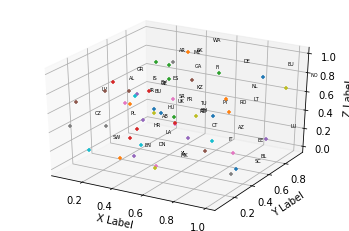

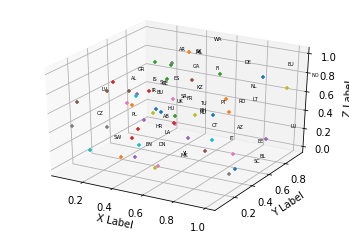

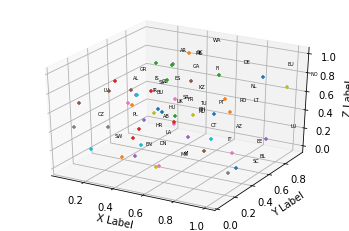

Error in callback <function flush_figures at 0x000002B5DA0939D8> (for post_execute):


KeyboardInterrupt: 

In [224]:
p = 1

for x in range (0,100) :   
    for index, row in dfDT.iterrows(): 
        row['x'] = np.random.normal(row['x'], p, 1)[0]
        row['y'] = np.random.normal(row['y'], p, 1)[0]
        row['z'] = np.random.normal(row['z'], p, 1)[0]

    for i in range(0,len(dfDT.index)) :
        for j in range(0,len(dfDT.index)):
            d = sqrt((dfDT['x'][i]-(dfDT['x'][j]))**2+(dfDT['y'][i]-(dfDT['y'][j]))**2+(dfDT['z'][i]-(dfDT['z'][j]))**2)
            dfL2[dfDT.index[i]][dfDT.index[j]] = d
    dfL2
    dfL = dfL.astype("float32")
    dfL2 = dfL2.astype("float32")
    c2 = st.mean(dfL.corrwith(dfL2))

    if c2 > c1 :
        dfD = dfDT.copy()
        c1 = c2
    else :
        dfDT = dfD.copy()
        
    sys.stdout.flush()
    clear_output(wait=True)
    print(c1*100)
    
    #RGB = (dfD - dfD.min()) / (dfD.max() - dfD.min())*255
    
    #for index, row in RGB.iterrows(): 

        #fg.color = Style(RgbFg(int(row['x']), int(row['y']), int(row['z'])))
        #print((int(row['x']), int(row['y']), int(row['z'])))

        #buf = fg.color + row.name + fg.rs

        #print(buf, sep='\n')
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for index, row in dfD.iterrows(): 
        xs = row['x']
        ys = row['y']
        zs = row['z']
        n = row.name
        ax.scatter(xs, ys, zs, marker="+")
        ax.text(xs+0.1, ys+0.1, zs+0.1, n, fontsize=5)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    fig = plt.figure(1, figsize=(25, 8))
    
    #plt.show()
    
    fig.savefig('img/an'+str(x)+'.png',dpi=50)

print(c1)

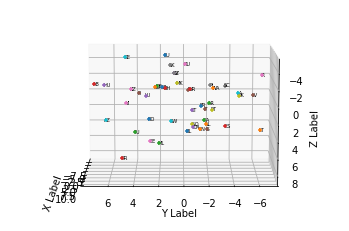

In [150]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for index, row in dfD.iterrows(): 
    xs = row['x']
    ys = row['y']
    zs = row['z']
    n = row.name
    ax.scatter(xs, ys, zs, marker="+")
    ax.text(xs+0.1, ys+0.1, zs+0.1, n, fontsize=5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

fig = plt.figure(1, figsize=(25, 8))
for i in range (0,36) :
    ax.view_init(30, i*10)
    fig.savefig('img/lan_3d_x'+str(i*10)+'.png',dpi=200)
    
for i in range (3,36) :
    ax.view_init(i*10, 0)
    fig.savefig('img/lan_3d_y'+str(i*10)+'.png',dpi=200)

plt.show()


#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

In [190]:
RGB = round((dfD - dfD.min()) / (dfD.max() - dfD.min())*255,0)

In [191]:
RGB

,x,y,z
FR,101.126,91.6583,132.854
EN,115.049,100.605,176.28
DE,95.0751,158.248,104.756
ES,129.269,43.0796,158.897
CT,123.474,91.5642,144.976
IT,121.556,85.0325,136.452
RU,116.485,104.63,10.2433
PL,176.627,76.0045,66.1971
UK,188.592,53.0467,99.6339
AZ,132.708,232.524,157.496


In [192]:
from sty import fg, Style, RgbFg

for index, row in RGB.iterrows(): 

    fg.color = Style(RgbFg(int(row['x']), int(row['y']), int(row['z'])))
    #print((int(row['x']), int(row['y']), int(row['z'])))
    
    buf = fg.color + row.name + fg.rs

    print(buf, sep='\n')

FR
EN
DE
ES
CT
IT
RU
PL
UK
AZ
RO
NL
TU
GR
HU
FI
EE
CZ
PT
SW
SR
BU
AR
HR
DN
AL
KZ
SK
NO
GE
BL
LT
GA
BH
SV
LV
YI
SC
MK
LA
EU
WA
ML
AB
LU
IS
IR
